# General Text Word Clouds 

### wcloudimage.py  and wcloudimagenocovid.py

In order to create the word clous, we need the following packages:

In [1]:
import pandas as pd
import numpy as np
import json
import sys
import string
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
from PIL import Image
import nltk
from nltk.corpus import stopwords
import itertools
import altair as alt

then we have defined the following functions to clean the tweets' text:

In [2]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_urls(text):
    result = re.sub(r"http\S+", "", text)
    return(result)

def remove_twitter_urls(text):
    clean = re.sub(r"pic.twitter\S+", "",text)
    return(clean)

def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)

def noamp(text):
    clean = re.sub("&amp", " ",text)
    return (clean)

To read the JSON file that has all the tweets, it is necessary to do:

In [3]:
data = []
with open('dataset/general_result.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

We're interested in the "full_text" field

In [4]:
index=0
comment_words = ''
stop_words = stopwords.words('english')
for element in data:
    data[index]['full_text'] = data[index]['full_text'].lower()#new - metto tutto minuscolo
    #data[index]['full_text'] = contractions.fix(data[index]['full_text'])
    data[index]['full_text'] = re.sub("\'\w+", '', data[index]['full_text'])#new - rimuove tutto quello dopo '
    data[index]['full_text'] = remove_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_twitter_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_emoticons(data[index]['full_text'])
    data[index]['full_text'] = remove_emoji(data[index]['full_text'])
    data[index]['full_text'] = give_emoji_free_text(data[index]['full_text'])
    data[index]['full_text'] = noamp(data[index]['full_text'])#new - no amp con lo spazio
    data[index]['full_text'] = re.sub("#\S+", " ",  data[index]['full_text'])#new - remove hashtag
    data[index]['full_text'] = re.sub("@\S+", " ",  data[index]['full_text'])#new - no mentions
    data[index]['full_text'] = data[index]['full_text'].translate(str.maketrans('', '', string.punctuation))#new - no puntuaction
    data[index]['full_text'] = data[index]['full_text'].encode('ascii', 'ignore').decode()#new - no unicode
    data[index]['full_text'] = re.sub("^rt ", " ", data[index]['full_text'])#new - no RT
    data[index]['full_text'] = re.sub('\s{2,}', " ", data[index]['full_text'])#new - remove big spaces

    
    tokens=data[index]['full_text'].split()

    comment_words += " ".join(tokens)+" "
    index=index+1

Then the word cloud is created

In [5]:
mask_covid= np.array(Image.open('grafici/face_mask.jpg'))

wordcloud_covid = WordCloud(background_color ='white',
            mask=mask_covid,
            width=mask_covid.shape[1],
            height=mask_covid.shape[0],
            stopwords = stop_words,
            normalize_plurals=False,
            min_word_length = 3,
            max_words=400,
            font_path = 'grafici/GothamMedium.ttf',
            min_font_size = 10).generate(comment_words)

distribuzione = wordcloud_covid.process_text(comment_words)
#print(distribuzione)
fdist_sorted = dict(sorted(distribuzione.items(), key=lambda item: item[1], reverse=True))
#print(fdist_sorted)
out = dict(itertools.islice(fdist_sorted.items(), 15))

df = pd.DataFrame.from_dict(out, orient='index').reset_index()
df = df.rename(columns={'index':'words', 0:'count'})
#print(df)
alt.renderers.enable('altair_viewer',inline=True)


alt.Chart(
    df,
    title = "Most 15 frequent words in the dataset"
).mark_bar().encode(
    x=alt.X('count:Q'),
    y=alt.Y('words:N',sort='-x'),
    color=alt.Color('count:Q',scale=alt.Scale(scheme="greens"))
).transform_window(
    rank='rank(count)',
    sort=[alt.SortField('count', order='descending')]
).transform_filter(
    (alt.datum.rank < 15)
)

alt.Chart(...)

Plot the word cloud (WITH COVID)

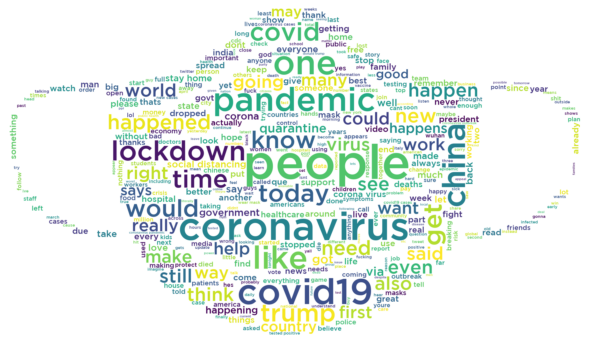

In [6]:
#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_covid,interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 

Filter the covid words from the full text

In [7]:
index_nocovid=0
comment_words_nocovid = ''
stop_words_nocovid = stopwords.words('english') + ["2019ncov", "covid19", "indiafightscorona", "coronavirus", "sarscov2", "corona", "covid_19", "covid","coronavirusoutbreak","covid2019", "virus", "covid__19", "covidー19", "covid-19", "pandemic", "coronaviruspandemic", "covid19outbreak"]
for element in data:
    data[index_nocovid]['full_text'] = data[index_nocovid]['full_text'].lower()#new - metto tutto minuscolo
    #data[index]['full_text'] = contractions.fix(data[index]['full_text'])
    data[index_nocovid]['full_text'] = re.sub("\'\w+", '', data[index_nocovid]['full_text'])#new - rimuove tutto quello dopo '
    data[index_nocovid]['full_text'] = remove_urls(data[index_nocovid]['full_text'])
    data[index_nocovid]['full_text'] = remove_twitter_urls(data[index_nocovid]['full_text'])
    data[index_nocovid]['full_text'] = remove_emoticons(data[index_nocovid]['full_text'])
    data[index_nocovid]['full_text'] = remove_emoji(data[index_nocovid]['full_text'])
    data[index_nocovid]['full_text'] = give_emoji_free_text(data[index_nocovid]['full_text'])
    data[index_nocovid]['full_text'] = noamp(data[index_nocovid]['full_text'])#new - no amp con lo spazio
    data[index_nocovid]['full_text'] = re.sub("#\S+", " ",  data[index_nocovid]['full_text'])#new - remove hashtag
    data[index_nocovid]['full_text'] = re.sub("@\S+", " ",  data[index_nocovid]['full_text'])#new - no mentions
    data[index_nocovid]['full_text'] = data[index_nocovid]['full_text'].translate(str.maketrans('', '', string.punctuation))#new - no puntuaction
    data[index_nocovid]['full_text'] = data[index_nocovid]['full_text'].encode('ascii', 'ignore').decode()#new - no unicode
    data[index_nocovid]['full_text'] = re.sub("^rt ", " ", data[index_nocovid]['full_text'])#new - no RT
    data[index_nocovid]['full_text'] = re.sub('\s{2,}', " ", data[index_nocovid]['full_text'])#new - remove big spaces

    
    tokens_nocovid=data[index_nocovid]['full_text'].split()

    comment_words_nocovid += " ".join(tokens_nocovid)+" "
    index_nocovid=index_nocovid+1

Generate the word cloud and visualize the top words

In [8]:
mask= np.array(Image.open('grafici/twitter.jpg'))

wordcloud = WordCloud(background_color ='white',
            mask=mask,
            width=mask.shape[1],
            height=mask.shape[0],          
            stopwords = stop_words_nocovid, 
            normalize_plurals=False,
            min_word_length = 3,
            font_path = 'grafici/GothamMedium.ttf',
            min_font_size = 10).generate(comment_words_nocovid) 
  
dis = wordcloud.process_text(comment_words_nocovid)
#print(distribuzione)
fdist_sorted_nocovid = dict(sorted(dis.items(), key=lambda item: item[1], reverse=True))
#print(fdist_sorted)
out_nocovid = dict(itertools.islice(fdist_sorted_nocovid.items(), 15))

df_nocovid = pd.DataFrame.from_dict(out_nocovid, orient='index').reset_index()
df_nocovid = df_nocovid.rename(columns={'index':'words', 0:'count'})
alt.renderers.enable('altair_viewer',inline=True)


alt.Chart(
    df_nocovid,
    title = "Most 15 frequent words in the dataset without covid"
).mark_bar().encode(
    x=alt.X('count:Q'),
    y=alt.Y('words:N',sort='-x'),
    color=alt.Color('count:Q',scale=alt.Scale(scheme="blues"))
).transform_window(
    rank='rank(count)',
    sort=[alt.SortField('count', order='descending')]
).transform_filter(
    (alt.datum.rank < 15)
)

alt.Chart(...)

Plot the word cloud

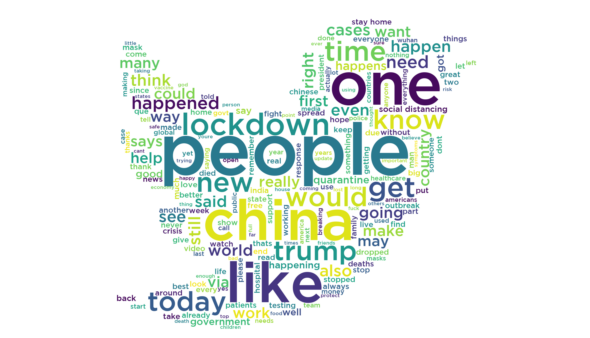

In [9]:
#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud,interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()